In [15]:
from sklearn.datasets import load_iris
import numpy as np

iris=load_iris()
X=iris.data
y=iris.target


def one_hot(y, num_classes):
    return np.eye(num_classes)[y]

y_oh = one_hot(y, 3)




In [16]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y_oh, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [17]:
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy(y_true, y_pred):
    eps = 1e-9
    return -np.mean(np.sum(y_true * np.log(y_pred + eps), axis=1))

In [18]:
np.random.seed(42)

input_dim = 4
hidden1 = 16
hidden2 = 8
output_dim = 3

W1 = np.random.randn(input_dim, hidden1) * 0.1
b1 = np.zeros((1, hidden1))

W2 = np.random.randn(hidden1, hidden2) * 0.1
b2 = np.zeros((1, hidden2))

W3 = np.random.randn(hidden2, output_dim) * 0.1
b3 = np.zeros((1, output_dim))



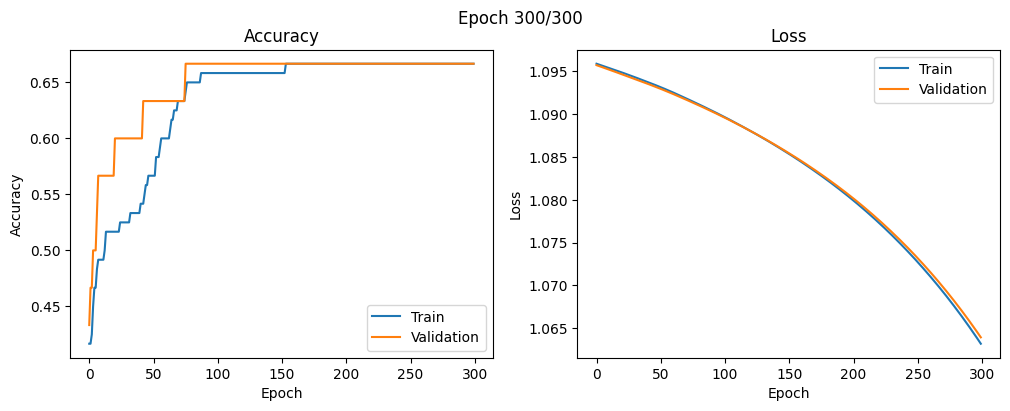

In [22]:

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from IPython.display import clear_output

plt.ion()

learning_rate = 0.01
epochs = 300
plot_every = 5

train_loss, val_loss = [], []
train_acc, val_acc = [], []

for epoch in range(epochs):
    # Forward Pass
    z1 = X_train @ W1 + b1
    a1 = relu(z1)

    z2 = a1 @ W2 + b2
    a2 = relu(z2)

    z3 = a2 @ W3 + b3
    y_pred = softmax(z3)
    
    # Metrics
    loss = cross_entropy(y_train, y_pred)
    acc = accuracy_score(
        np.argmax(y_train, axis=1),
        np.argmax(y_pred, axis=1)
    )

    train_loss.append(loss)
    train_acc.append(acc)
    

    # Backpropagation
    dz3 = y_pred - y_train
    dW3 = a2.T @ dz3 / len(X_train)
    db3 = dz3.mean(axis=0, keepdims=True)

    da2 = dz3 @ W3.T
    dz2 = da2 * relu_derivative(z2)
    dW2 = a1.T @ dz2 / len(X_train)
    db2 = dz2.mean(axis=0, keepdims=True)

    da1 = dz2 @ W2.T
    dz1 = da1 * relu_derivative(z1)
    dW1 = X_train.T @ dz1 / len(X_train)
    db1 = dz1.mean(axis=0, keepdims=True)
    
    # Update Weights
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    
    # Validation 
    a1_v = relu(X_test @ W1 + b1)
    a2_v = relu(a1_v @ W2 + b2)
    y_test_pred = softmax(a2_v @ W3 + b3)

    val_loss.append(cross_entropy(y_test, y_test_pred))
    val_acc.append(
        accuracy_score(
            np.argmax(y_test, axis=1),
            np.argmax(y_test_pred, axis=1)
        )
    )
    
    # Live Plot
    if epoch % plot_every == 0 or epoch == epochs - 1:
        clear_output(wait=True)

        plt.figure(figsize=(12,4))

        plt.subplot(1,2,1)
        plt.plot(train_acc, label="Train")
        plt.plot(val_acc, label="Validation")
        plt.title("Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()

        plt.subplot(1,2,2)
        plt.plot(train_loss, label="Train")
        plt.plot(val_loss, label="Validation")
        plt.title("Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()

        plt.suptitle(f"Epoch {epoch+1}/{epochs}")
        plt.show()



In [23]:
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")

Final Validation Accuracy: 0.6667
